Необходимо провести чистку/восстановление признаков и отдельных экземпляров.  
Использовать тепловую матрицу для удаления сильно зависимых признаков, найти и выбрать наиболее важные для настройки модели признаки посредством алгоритма Gain Ratio (коэффициент усиления) из алгоритма классификации с помощью деревьев решений C4.5. Рассказать о проделанной работе и обосновать каждое преобразование датасета. За основу берём датасет с данными о ценах на лаптопы.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Laptop_price.csv")

In [3]:
num_cols = df.select_dtypes([np.number]).columns

In [4]:
# Замена NAN значений на среднее (в нашем случае NAN нет)
df = df.fillna(df.mean(numeric_only=True))

In [5]:
# Убрать дупликаты 
df = df.drop_duplicates()

In [6]:
def covar(x,y):
    return (np.sum(np.multiply(x - x.mean(), y - y.mean())) / (x.shape[0]-1))

def std(x):
    return np.sqrt(np.sum((x-x.mean())**2) / x.shape[0])

def corr(x,y):
    return (covar(x,y) / (std(x) * std(y)))

In [7]:
def corr_mat(df):
    dict = {}
    for i in df.columns:
        dict[i] = []
        for j in df.columns:
            dict[i].append(corr(df[i],df[j]))

    return pd.DataFrame(dict,columns = df.columns, index = df.columns)

In [8]:
handmade_cm = corr_mat(df[num_cols])

<Axes: >

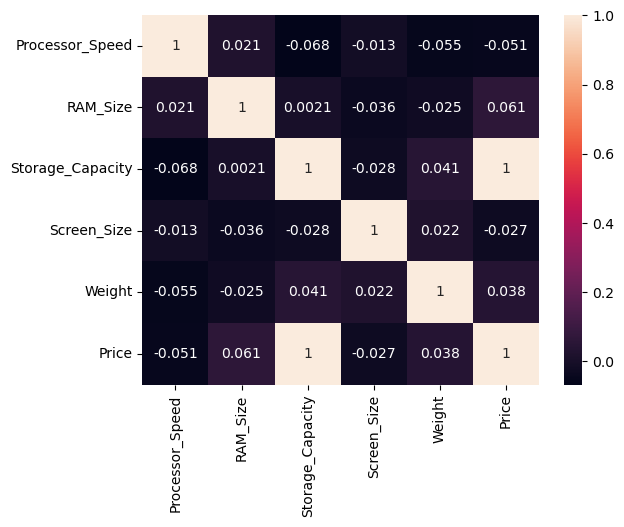

In [9]:
sns.heatmap(handmade_cm, annot=True)

In [10]:
df['Price'] = pd.cut(df['Price'], bins = [0,20000,33000,35000], labels = ['low','medium','high'])

In [11]:
def entropy(X):
    return -(sum((x / X.shape[0]) * (np.log2(x / X.shape[0])) for x in X.value_counts().loc[lambda y : y > 0]))
def info_gain(X, y):
    return entropy(y) - sum((X[X == x].shape[0] / X.shape[0]) * entropy(y[X == x]) for x in X.unique())
def gain_ratio(X, y):
    return (info_gain(X, y) / entropy(X))

In [12]:
x = df.drop('Price', axis = 1)
y = df['Price']


In [13]:
gain_ratio(df['Screen_Size'],y)

0.10601213450835735